In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./imports-by-country-breed-type-age-and-sex-april-2009-1.csv', skiprows=1)

In [3]:
raw_data.head()

,Age,Breed Type,Sex,AUSTRIA,CZECH REPUBLIC,DENMARK,FRANCE,GERMANY,IRELAND,NETHERLANDS,NORTHERN IRELAND,SWEDEN,Unnamed: 12
0,Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0,30
1,NaN,NaN,M,0,0,0,0,0,0,0,1,0,3
2,1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0,19
3,NaN,NaN,M,0,0,0,0,0,0,0,1,0,5
4,2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0,14


In [4]:
raw_data.shape

(45, 13)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               15 non-null     object
 1   Breed Type        26 non-null     object
 2   Sex               44 non-null     object
 3   AUSTRIA           45 non-null     int64 
 4   CZECH REPUBLIC    45 non-null     int64 
 5   DENMARK           45 non-null     int64 
 6   FRANCE            45 non-null     int64 
 7   GERMANY           45 non-null     int64 
 8   IRELAND           45 non-null     int64 
 9   NETHERLANDS       45 non-null     int64 
 10  NORTHERN IRELAND  45 non-null     object
 11  SWEDEN            45 non-null     int64 
 12  Unnamed: 12       45 non-null     object
dtypes: int64(8), object(5)
memory usage: 4.7+ KB


In [6]:
data = raw_data.copy(deep=True)

In [7]:
name = []
value = []
percentage = []

for column in data.columns:
    if data[column].isnull().any():
            name.append(column), 
            value.append(data[column].isna().sum()),   
            percentage.append(f'{round(data[column].isna().sum()/data.shape[0]*100, 2)}%')

pd.DataFrame(
    {'Name':name, 'Value':value, 'Percentage':percentage}
)

,Name,Value,Percentage
0,Age,30,66.67%
1,Breed Type,19,42.22%
2,Sex,1,2.22%


In [8]:
data['Age'] = data['Age'].fillna(method='ffill')
data['Breed Type'] = data['Breed Type'].fillna(method='ffill')
data = data.drop(44)

In [9]:
data.columns

Index(['Age', 'Breed Type', 'Sex', 'AUSTRIA', 'CZECH REPUBLIC', 'DENMARK',
       'FRANCE', 'GERMANY', 'IRELAND', 'NETHERLANDS', 'NORTHERN IRELAND',
       'SWEDEN', 'Unnamed: 12'],
      dtype='object')

In [10]:
data.columns = data.columns.str.replace(' ', '_')

In [11]:
data.columns = data.columns.str.capitalize()

In [12]:
data.columns

Index(['Age', 'Breed_type', 'Sex', 'Austria', 'Czech_republic', 'Denmark',
       'France', 'Germany', 'Ireland', 'Netherlands', 'Northern_ireland',
       'Sweden', 'Unnamed:_12'],
      dtype='object')

In [13]:
data['Northern_ireland'] = data['Northern_ireland'].astype('int64')

In [14]:
data = data.drop(columns=['Unnamed:_12'])

In [15]:
data.describe(include='object')

,Age,Breed_type,Sex
count,44,44,44
unique,14,2,2
top,6 to 12,Non Dairy,F
freq,4,28,22


In [16]:
data.head()

,Age,Breed_type,Sex,Austria,Czech_republic,Denmark,France,Germany,Ireland,Netherlands,Northern_ireland,Sweden
0,Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0
1,Under 1,Non Dairy,M,0,0,0,0,0,0,0,1,0
2,1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0
3,1 to 2,Non Dairy,M,0,0,0,0,0,0,0,1,0
4,2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0


In [17]:
cat_cols =['Age', 'Breed_type', 'Sex']

In [18]:
for column in cat_cols:
    print(data[column].value_counts().sort_values(ascending=True))

Under 1        2
1 to 2         2
2 to 3         3
3 to 4         3
4 to 5         3
5 to 6         3
30 to 36       3
48 to 60       3
60 to 72       3
72 and Over    3
6 to 12        4
12 to 24       4
24 to 30       4
36 to 48       4
Name: Age, dtype: int64
Dairy        16
Non Dairy    28
Name: Breed_type, dtype: int64
F    22
M    22
Name: Sex, dtype: int64


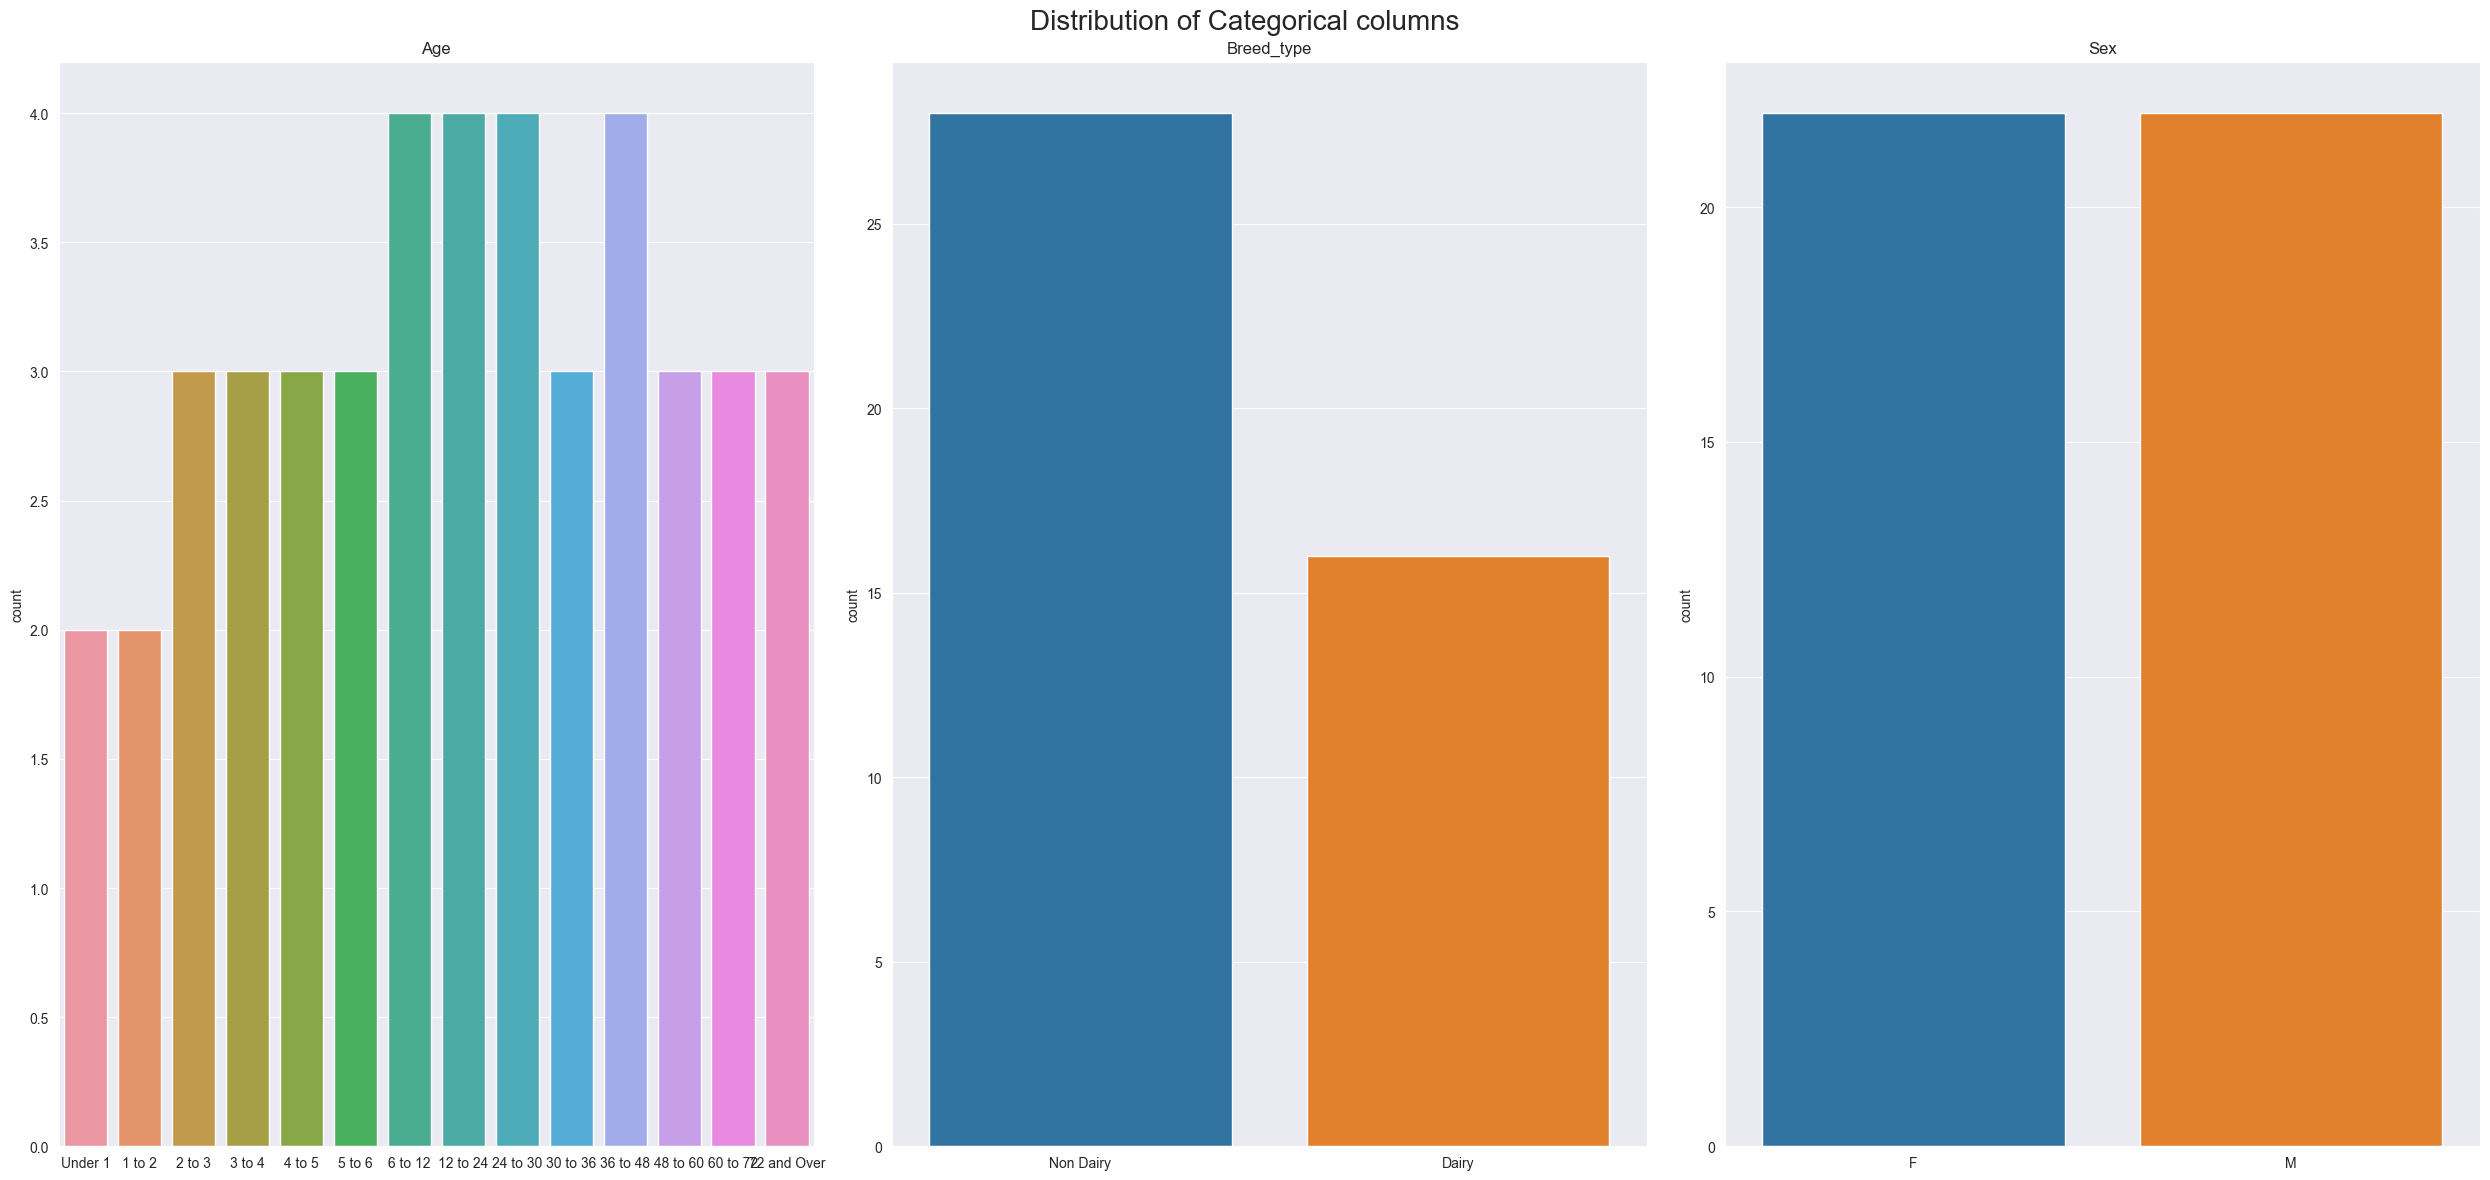

In [19]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 12))

axes = axes.flat


for index, column in enumerate(data[cat_cols]):
    sns.countplot(
        data=data,
        x=column,
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(column)

fig.suptitle('Distribution of Categorical columns', size=20)
fig.tight_layout()

In [20]:
data.columns

Index(['Age', 'Breed_type', 'Sex', 'Austria', 'Czech_republic', 'Denmark',
       'France', 'Germany', 'Ireland', 'Netherlands', 'Northern_ireland',
       'Sweden'],
      dtype='object')

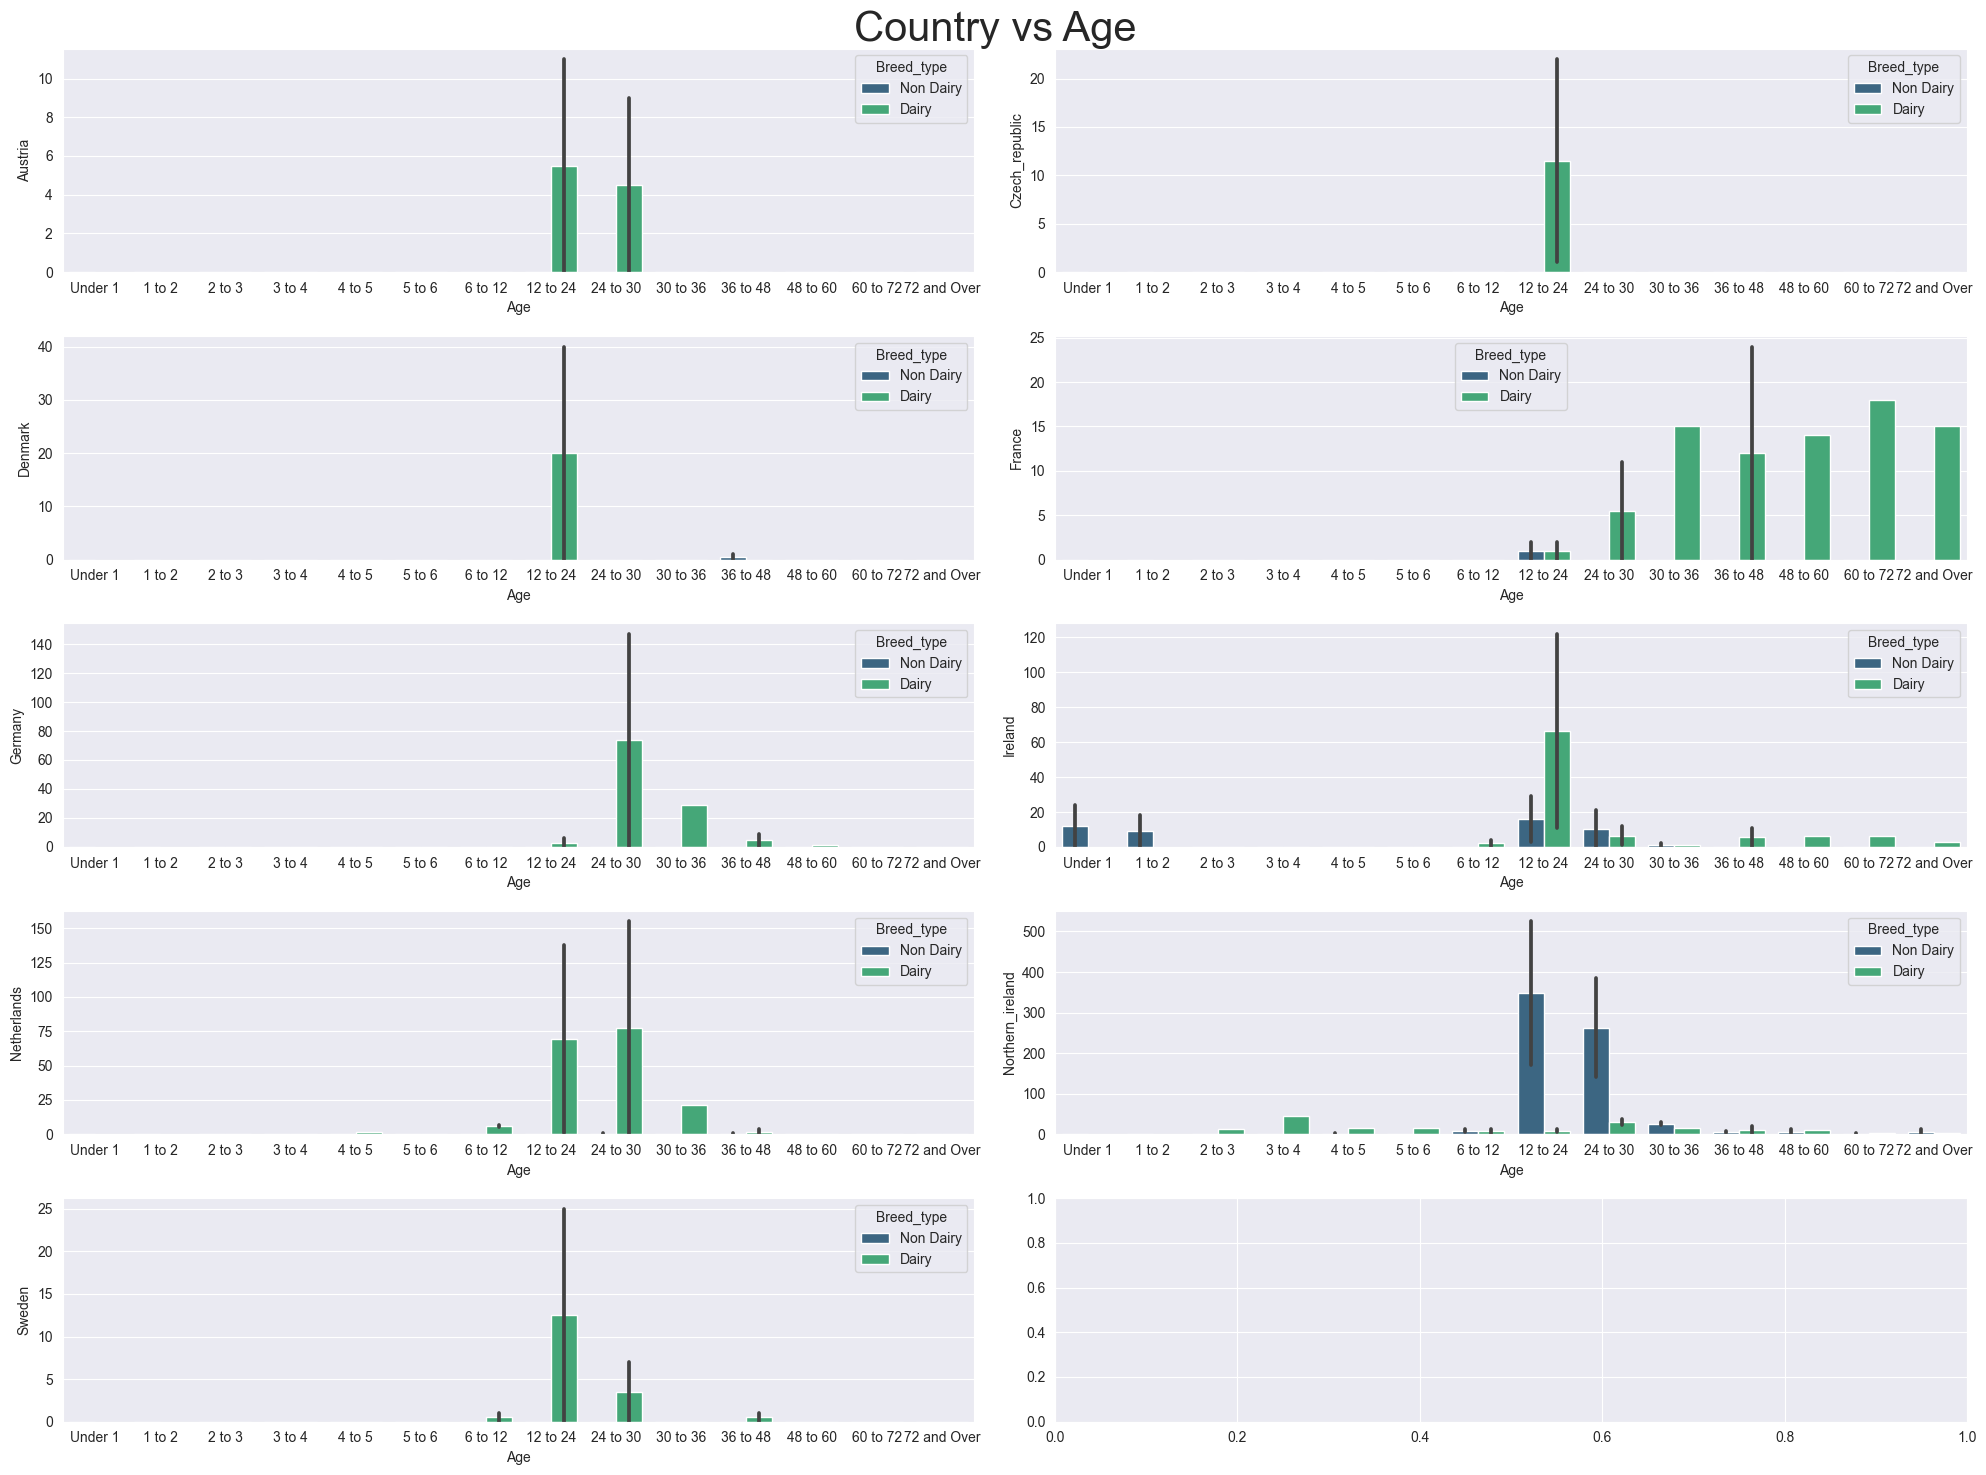

In [21]:
country_cols = ['Austria', 'Czech_republic', 'Denmark',
                'France', 'Germany', 'Ireland', 'Netherlands', 
                'Northern_ireland', 'Sweden']

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 15))

axes = axes.flat

for index, column in enumerate(data[country_cols]):
    sns.barplot(
        data=data,
        x='Age',
        y=column,
        hue='Breed_type',
        palette='viridis',
        ax=axes[index]
)
fig.suptitle('Country vs Age', size=30)
fig.tight_layout()

- Most of the country bought dairy breed animals.
- Only Northern Ireland country bought most non dairy breed type animals.
- Ireland country exclusively bought under age of 2 non dairy breed type animals.
- Northern Ireland and Netherlands bought below 6 aged animals.
- France country bought 12 age to 72 age dairy breed type animals.
- Northern Ireland country bought 

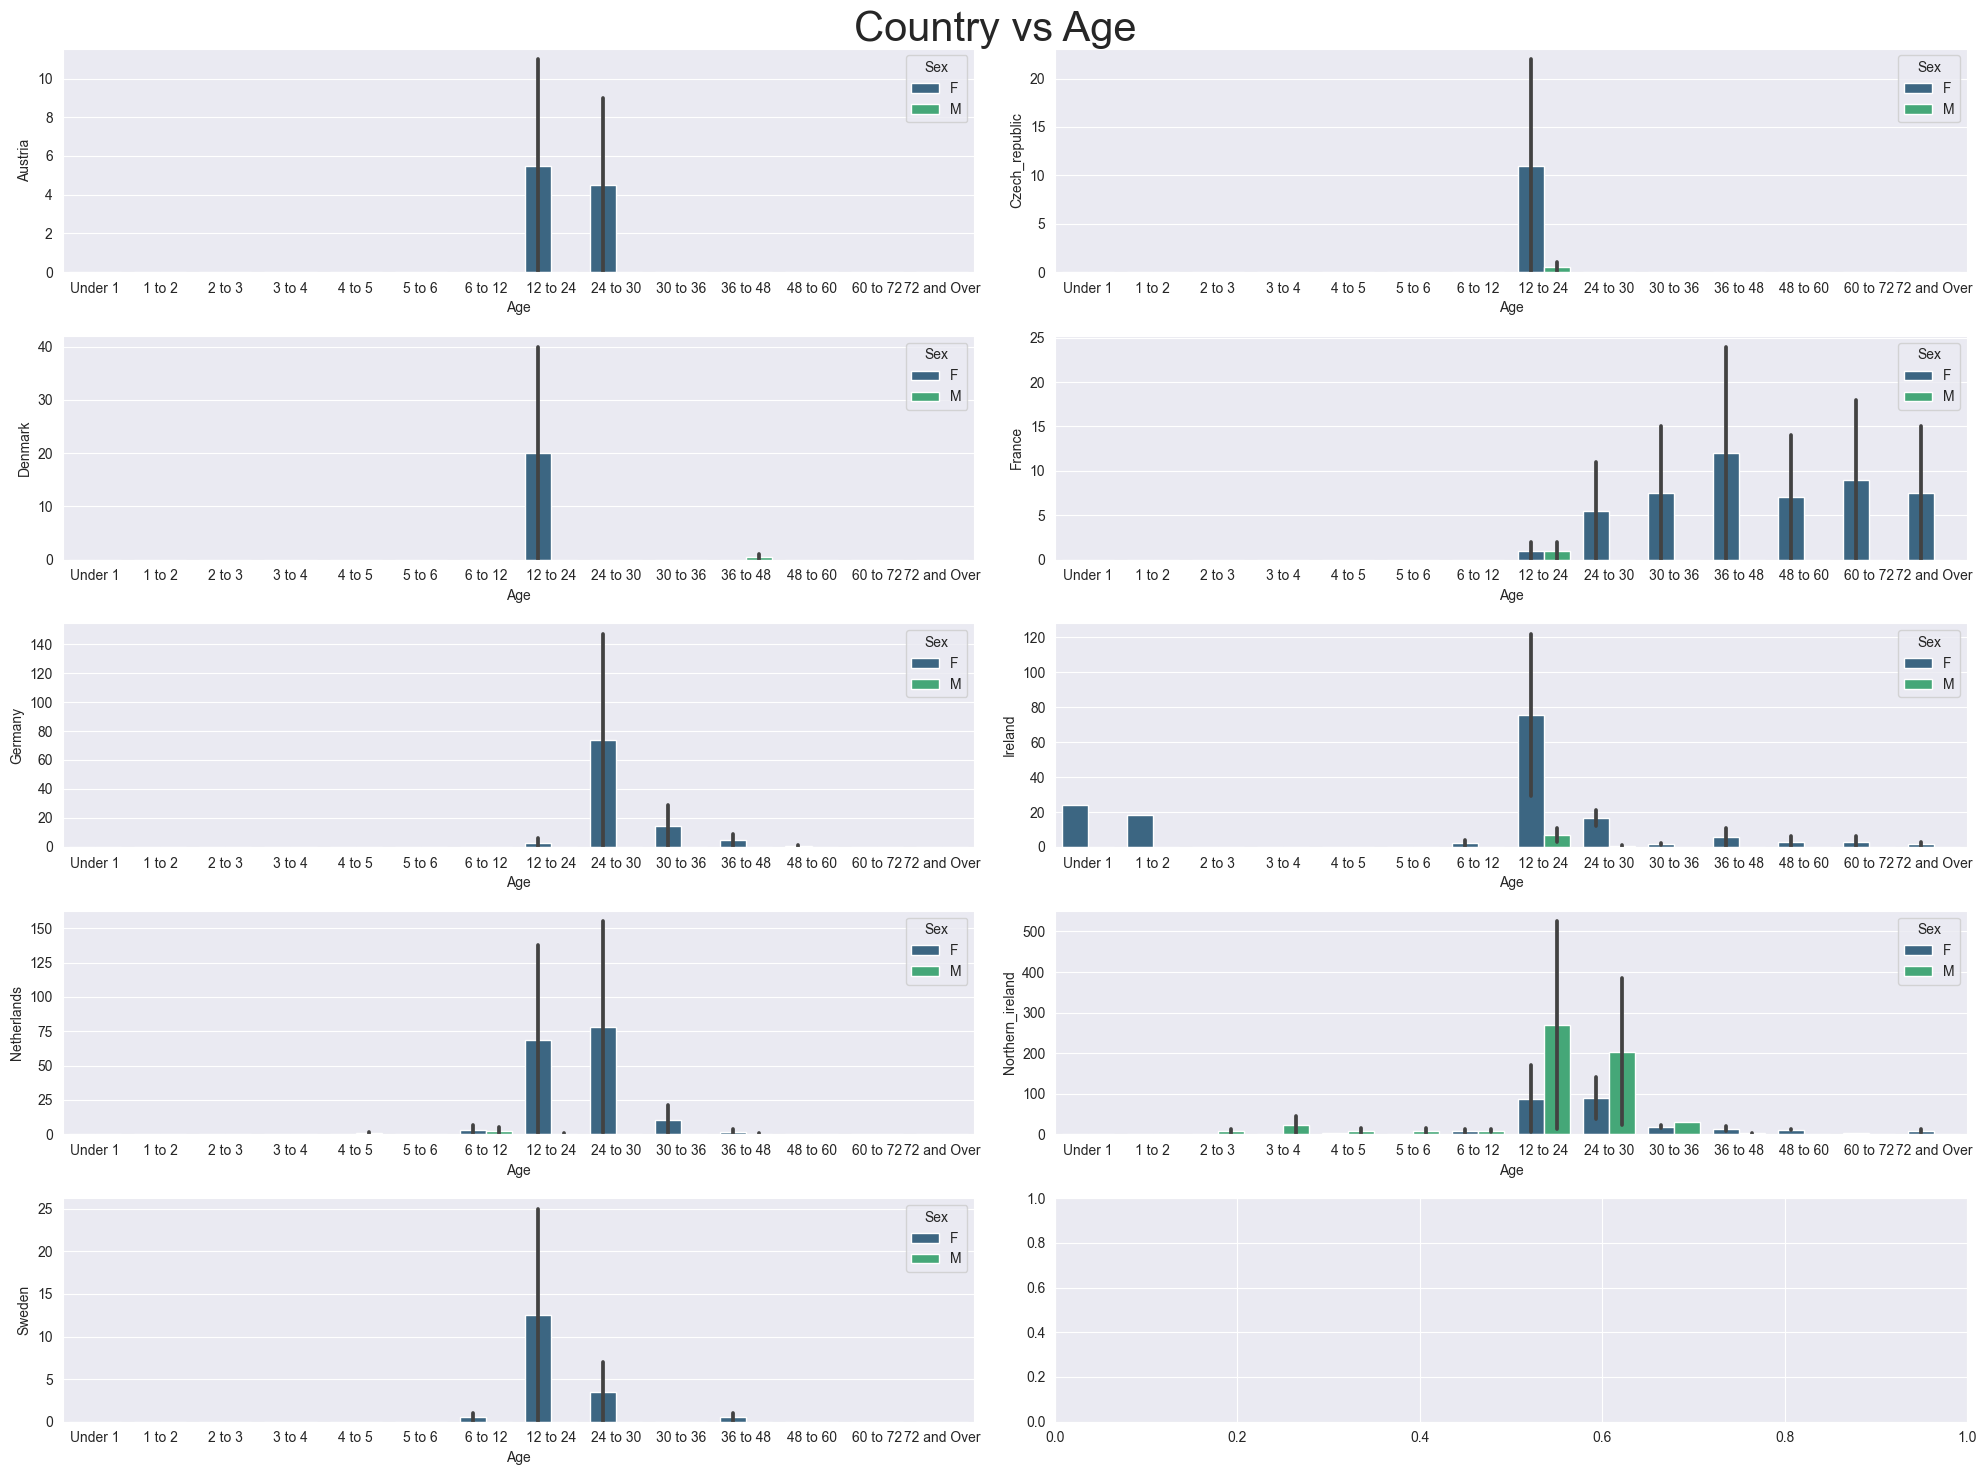

In [22]:
country_cols = ['Austria', 'Czech_republic', 'Denmark',
                'France', 'Germany', 'Ireland', 'Netherlands', 
                'Northern_ireland', 'Sweden']

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 15))

axes = axes.flat

for index, column in enumerate(data[country_cols]):
    sns.barplot(
        data=data,
        x='Age',
        y=column,
        hue='Sex',
        palette='viridis',
        ax=axes[index]
)
fig.suptitle('Country vs Age', size=30)
fig.tight_layout()

- Most of the country bought female type animals. 


In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in data.iloc[:, 0:3]:
    data[column] = encoder.fit_transform(data[column].values)

In [24]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

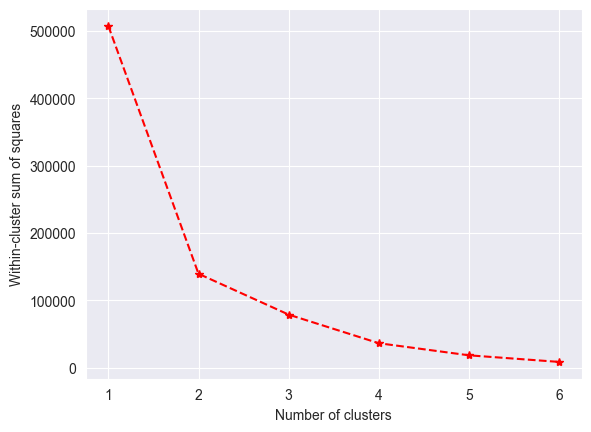

In [25]:
# Plot the WCSS versus the number of clusters
plt.plot(k_range, wcss, '*--', c='red')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(data)

labels = kmeans.labels_

data['cluster'] = labels

In [64]:
data.head()

,Age,Breed_type,Sex,Austria,Czech_republic,Denmark,France,Germany,Ireland,Netherlands,Northern_ireland,Sweden,cluster
0,13,1,0,0,0,0,0,0,24,0,2,0,0
1,13,1,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,18,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,1,0,0
4,2,0,1,0,0,0,0,0,0,0,14,0,0


In [65]:
from sklearn import metrics

silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.8788220064088967


In [66]:
# Splitting the dataset into target and features
x=data.iloc[:, 0:-1]
y=data.iloc[:,-1]

In [67]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x, y, random_state=4, test_size=0.33, stratify=y)

In [68]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (29, 12)
xtest shape:  (15, 12)
ytrain shape:  (29,)
ytest shape:  (15,)


In [82]:
# building the model

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def select_model_predict(model):
    
    # Training the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #Checking Bias-variance tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(model)
    print(dataframe)
    print('\n')

    sns.heatmap(confusion_matrix(ytest, ypred), annot=True)

    # Classification Report for the model
    report = classification_report(ytest, ypred)
    print(report)
    
    return model

GaussianNB()
                     Value
Train Accuracy  100.000000
Test Accuracy    93.333333


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



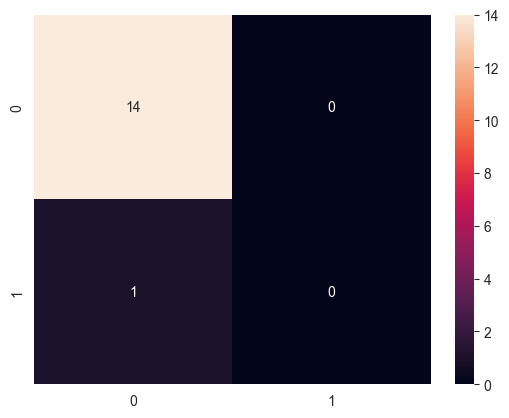

In [83]:
gnb = select_model_predict(GaussianNB())

MultinomialNB()
                     Value
Train Accuracy   86.206897
Test Accuracy   100.000000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



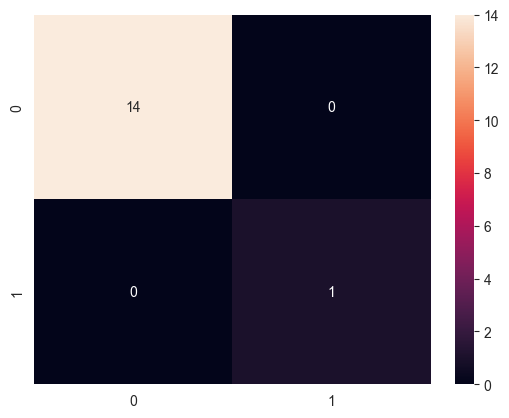

In [84]:
mnb = select_model_predict(MultinomialNB())

BernoulliNB()
                    Value
Train Accuracy  93.103448
Test Accuracy   86.666667


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.00      0.00      0.00         1

    accuracy                           0.87        15
   macro avg       0.46      0.46      0.46        15
weighted avg       0.87      0.87      0.87        15



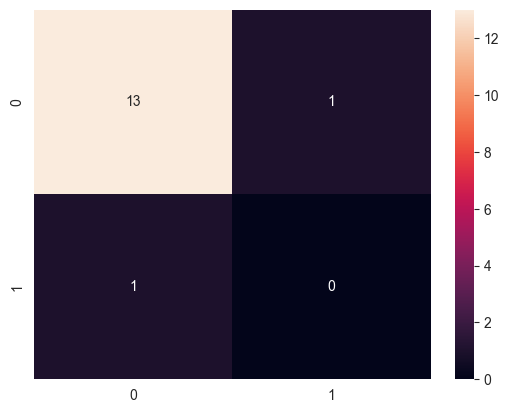

In [85]:
bnb = select_model_predict(BernoulliNB())

LogisticRegression()
                Value
Train Accuracy  100.0
Test Accuracy   100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



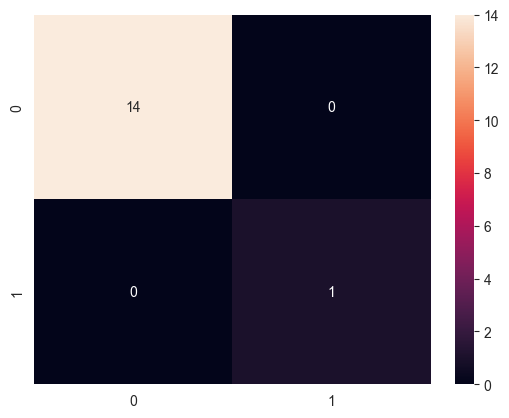

In [86]:
lr = select_model_predict(LogisticRegression())